<a href="https://colab.research.google.com/github/wapratama/AUTO_1/blob/main/Demo_Day_AUTO_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Add and install Library

In [ ]:
!pip install chart_studio
!pip install gdown
!pip install --upgrade gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.6 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=647ab48a4a90c431760796ea47bdaaf05228be7413d648a9a7a00e514a567a75
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-4.5.1-py3-none-any.whl size=14951 sha256=6836b6067ed25e9b435cdda1b23d3af341df7134db24d52805c4166af9ced4be
  Stored in directory: /root/.cache/pip/wheels/3d/ec/b0/a96d1d126183f98570a785e6bf87

In [ ]:
import pandas as pd
import numpy as np
import zipfile

%matplotlib inline
import matplotlib.pyplot as plt

import chart_studio.plotly as py
import plotly.express as px
import plotly.offline as pyoff
import plotly.graph_objs as go

import warnings
warnings.filterwarnings("ignore")

import gdown

## Import Datasets

In [ ]:
url = "https://drive.google.com/uc?id=1yLpcagzTYJ1eCOsWKuhYVDWWNuKPOUhm"
output = "Grocery Data.zip"
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1yLpcagzTYJ1eCOsWKuhYVDWWNuKPOUhm
To: /content/Grocery Data.zip
100%|██████████| 185k/185k [00:00<00:00, 33.7MB/s]


'Grocery Data.zip'

In [ ]:
zip_ref = zipfile.ZipFile("/content/Grocery Data.zip")
zip_ref.extractall("/content/")
zip_ref.close()
costs = pd.read_csv('/content/Costs.csv', delimiter=';')
grocery = pd.read_csv('/content/grocery_timestamp.csv', delimiter=';')

##Data Exploration

In [ ]:
# Function to display information about missing value
def show_null(df):
    """
    Return the total missing values and the percentage of
    missing values by column.
    """
    null_count = df.isnull().sum()
    null_percentage = (null_count / df.shape[0]) * 100
    empty_count = pd.Series(((df == ' ') | (df == '')).sum())
    empty_percentage = (empty_count / df.shape[0]) * 100
    nan_count = pd.Series(((df == 'nan') | (df == 'NaN') | (df == np.NaN)).sum())
    nan_percentage = (nan_count / df.shape[0]) * 100
    return pd.DataFrame({'num_missing': null_count, 
                         'missing_percentage': null_percentage,
                         'num_empty': empty_count, 
                         'empty_percentage': empty_percentage,
                         'nan_count': nan_count, 
                         'nan_percentage': nan_percentage})

###Costs Dataset

No.| Column name | Description
---|-------------|------------------
1  | product     | Product name
2  | demanda     | Customer's daily demand 
3  | price       | Selling price to customers
4  | unit_cost   | Production price per unit of product 
5  | order_cost  | Price of each order to supplier

In [ ]:
# Explore first 10 rows
costs.head(10)

,product,demanda,price,unit_cost,order_cost
0,air fresheners candles,39,"12,25","10,04",28
1,asian foods,245,"22,95","20,65",9
2,baby accessories,13,"28,92","22,27",21
3,baby bath body care,14,"24,99","20,99",5
4,baby food formula,505,"19,98","15,58",4
5,bakery desserts,56,"15,99","13,91",61
6,baking ingredients,507,"10,99","9,12",4
7,baking supplies decor,37,"10,8","9,29",48
8,beauty,18,"12,99","10,91",7
9,beers coolers,63,"67,49","53,99",10


In [ ]:
# Display dataset shape (rows, columns)
costs.shape

(134, 5)

In [ ]:
# Display descriptive statistics
print("Dataset Costs")
print(costs.describe(include="all"))

Dataset Costs
                       product      demanda price unit_cost  order_cost
count                      134   134.000000   134       134  134.000000
unique                     134          NaN    90       124         NaN
top     air fresheners candles          NaN  3,99      3,31         NaN
freq                         1          NaN     8         3         NaN
mean                       NaN   396.320896   NaN       NaN    8.574627
std                        NaN   780.879171   NaN       NaN   10.651257
min                        NaN    11.000000   NaN       NaN    4.000000
25%                        NaN    51.750000   NaN       NaN    4.000000
50%                        NaN   177.000000   NaN       NaN    4.000000
75%                        NaN   465.000000   NaN       NaN    8.000000
max                        NaN  5768.000000   NaN       NaN   61.000000


In [ ]:
# Display information about dataset
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product     134 non-null    object
 1   demanda     134 non-null    int64 
 2   price       134 non-null    object
 3   unit_cost   134 non-null    object
 4   order_cost  134 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 5.4+ KB


In [ ]:
# Display information about missing value
show_null(costs)

,num_missing,missing_percentage,num_empty,empty_percentage,nan_count,nan_percentage
product,0,0.0,0,0.0,0,0.0
demanda,0,0.0,0,0.0,0,0.0
price,0,0.0,0,0.0,0,0.0
unit_cost,0,0.0,0,0.0,0,0.0
order_cost,0,0.0,0,0.0,0,0.0


###Grocery Dataset

No.| Column name            | Description
---|------------------------|------------------
1  | order_id               | Order ID (unique identity) for each customer
2  | pay_method             | Payment method (1 = Cash; 2 = Credit Card; 3 = e-Money)
3  | order_hour_of_day      | Product order start hours (HH)
4  | arrival_timestamp      | Time of customer start store access (HH:MM:SS)
5  | pickup_timestamp       | Time of product added to cart (HH:MM:SS) 
6  | start_service_time     | Service start time (HH:MM:SS) 
7  | finish_service_time    | Finished service time (HH:MM:SS)
8  | days_since_prior_order | Number of days since previous order
9-  142  | [Product name]  | Number of purchases per product (134 columns of product name)

In [ ]:
# Explore first 10 rows
grocery.head(10)

,order_id,pay_method,order_hour_of_day,arrival_ timestamp,pickup_timestamp,start_service_time,finish_service_time,days_since_prior_order,air fresheners candles,asian foods,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
0,930878.0,2.0,0.0,0:00:22,0:07:10,0:07:10,0:09:43,17.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1494544.0,2.0,0.0,0:02:45,0:07:41,0:07:41,0:10:25,11.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3275833.0,1.0,0.0,0:03:17,0:23:22,0:23:22,0:26:11,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,57650.0,2.0,0.0,0:03:33,0:16:29,0:16:29,0:22:11,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2002409.0,1.0,0.0,0:03:59,0:19:11,0:19:11,0:24:25,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,60770.0,2.0,0.0,0:04:29,0:10:13,0:10:13,0:16:38,30.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,464722.0,3.0,0.0,0:05:49,0:30:13,0:30:13,0:35:07,26.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0
7,2852877.0,1.0,0.0,0:08:59,0:30:22,0:30:22,0:33:55,30.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2256545.0,2.0,0.0,0:15:42,0:28:10,0:28:10,0:34:37,30.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,2201462.0,3.0,0.0,0:17:00,0:25:21,0:25:21,0:32:24,7.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Display dataset shape (rows, columns)
grocery.shape

(5004, 142)

In [ ]:
# Display descriptive statistics
print("Grocery Dataset")
print(grocery.describe(include="all"))

Grocery Dataset
            order_id   pay_method  order_hour_of_day arrival_ timestamp  \
count   5.000000e+03  5000.000000        5000.000000               5000   
unique           NaN          NaN                NaN               4787   
top              NaN          NaN                NaN           12:07:52   
freq             NaN          NaN                NaN                  4   
mean    1.691644e+06     2.050400          13.599800                NaN   
std     9.834788e+05     0.862327           4.262731                NaN   
min     1.597000e+03     1.000000           0.000000                NaN   
25%     8.345488e+05     1.000000          10.000000                NaN   
50%     1.682633e+06     2.000000          14.000000                NaN   
75%     2.535834e+06     3.000000          17.000000                NaN   
max     3.420909e+06     3.000000          23.000000                NaN   

       pickup_timestamp start_service_time finish_service_time  \
count            

In [ ]:
# Display information about dataset
grocery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5004 entries, 0 to 5003
Columns: 142 entries, order_id to yogurt
dtypes: float64(138), object(4)
memory usage: 5.4+ MB


In [ ]:
# Display information about missing value
show_null(grocery)

,num_missing,missing_percentage,num_empty,empty_percentage,nan_count,nan_percentage
order_id,4,0.079936,0,0.0,0,0.0
pay_method,4,0.079936,0,0.0,0,0.0
order_hour_of_day,4,0.079936,0,0.0,0,0.0
arrival_ timestamp,4,0.079936,0,0.0,0,0.0
pickup_timestamp,4,0.079936,0,0.0,0,0.0
...,...,...,...,...,...,...
trash bags liners,4,0.079936,0,0.0,0,0.0
vitamins supplements,4,0.079936,0,0.0,0,0.0
water seltzer sparkling water,4,0.079936,0,0.0,0,0.0
white wines,4,0.079936,0,0.0,0,0.0


In [ ]:
# Check which rows have missing value
grocery.loc[grocery.isnull().any(axis=1)]

,order_id,pay_method,order_hour_of_day,arrival_ timestamp,pickup_timestamp,start_service_time,finish_service_time,days_since_prior_order,air fresheners candles,asian foods,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Data Preprocessing
This section is the initial data preprocessing to clean and filter dataset for further uses.

###Data Cleaning

In [ ]:
# Costs Dataset - Change numerical data from object to numeric data types
costs = costs.replace(',','.', regex=True)
costs['demanda'] = pd.to_numeric(costs['demanda'],errors='coerce')
costs['price'] = pd.to_numeric(costs['price'],errors='coerce')
costs['unit_cost'] = pd.to_numeric(costs['unit_cost'],errors='coerce')
costs['order_cost'] = pd.to_numeric(costs['order_cost'],errors='coerce')

display(costs.head(10))
display(costs.info())

,product,demanda,price,unit_cost,order_cost
0,air fresheners candles,39,12.25,10.04,28
1,asian foods,245,22.95,20.65,9
2,baby accessories,13,28.92,22.27,21
3,baby bath body care,14,24.99,20.99,5
4,baby food formula,505,19.98,15.58,4
5,bakery desserts,56,15.99,13.91,61
6,baking ingredients,507,10.99,9.12,4
7,baking supplies decor,37,10.80,9.29,48
8,beauty,18,12.99,10.91,7
9,beers coolers,63,67.49,53.99,10


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product     134 non-null    object 
 1   demanda     134 non-null    int64  
 2   price       134 non-null    float64
 3   unit_cost   134 non-null    float64
 4   order_cost  134 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 5.4+ KB


None

In [ ]:
# Grocery Dataset - Drop missing value
grocery = grocery.dropna()
show_null(grocery)

,num_missing,missing_percentage,num_empty,empty_percentage,nan_count,nan_percentage
order_id,0,0.0,0,0.0,0,0.0
pay_method,0,0.0,0,0.0,0,0.0
order_hour_of_day,0,0.0,0,0.0,0,0.0
arrival_ timestamp,0,0.0,0,0.0,0,0.0
pickup_timestamp,0,0.0,0,0.0,0,0.0
...,...,...,...,...,...,...
trash bags liners,0,0.0,0,0.0,0,0.0
vitamins supplements,0,0.0,0,0.0,0,0.0
water seltzer sparkling water,0,0.0,0,0.0,0,0.0
white wines,0,0.0,0,0.0,0,0.0


###Data Filtering

In [ ]:
# Grocery Dataset - Filter product data only to a new dataset
grocery['order_id'] = grocery.order_id.astype(int)
order_products = grocery.iloc[:, 8:].set_index(grocery.order_id)
order_products.head(10)

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
order_id,,,,,,,,,,,,,,,,,,,,,
930878,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1494544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3275833,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
57650,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2002409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
60770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
464722,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0
2852877,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2256545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Costs Dataset - Filter product name and price to a new dataset
product_prices = costs[['product', 'price']]
product_prices.head(10)

,product,price
0,air fresheners candles,12.25
1,asian foods,22.95
2,baby accessories,28.92
3,baby bath body care,24.99
4,baby food formula,19.98
5,bakery desserts,15.99
6,baking ingredients,10.99
7,baking supplies decor,10.80
8,beauty,12.99
9,beers coolers,67.49


In [ ]:
# Costs Dataset - Filter column Price to a new dataset
price = costs.price
price.head(10)

0    12.25
1    22.95
2    28.92
3    24.99
4    19.98
5    15.99
6    10.99
7    10.80
8    12.99
9    67.49
Name: price, dtype: float64

##Data Analysis & Visualization

###Products

In [ ]:
# Create dataframe for number of each product sold & its revenue
product_rev = pd.DataFrame(order_products.sum(axis=0),
                           columns=["num_sold"])
product_rev = product_prices.join(product_rev, on="product")
product_rev["revenue"] = product_rev.price.mul(product_rev.num_sold)
product_rev["category"] = "Products" # for visualization purposes

display(product_rev.head(10))

,product,price,num_sold,revenue,category
0,air fresheners candles,12.25,39.0,477.75,Products
1,asian foods,22.95,245.0,5622.75,Products
2,baby accessories,28.92,13.0,375.96,Products
3,baby bath body care,24.99,14.0,349.86,Products
4,baby food formula,19.98,505.0,10089.90,Products
5,bakery desserts,15.99,56.0,895.44,Products
6,baking ingredients,10.99,507.0,5571.93,Products
7,baking supplies decor,10.80,37.0,399.60,Products
8,beauty,12.99,18.0,233.82,Products
9,beers coolers,67.49,63.0,4251.87,Products


####Top 25 Sold Products

In [ ]:
product_rev = product_rev.sort_values("num_sold", ascending=False)
display(product_rev.head())

treemap_sold = px.treemap(product_rev.head(25), 
                          path=["category", "product"],
                          values='num_sold',
                          title='Top 25 Sold Products',
                          color=product_rev["num_sold"].head(25),
                          hover_data=['product'],
                          color_continuous_scale='RdBu',
                          )

treemap_sold.show()

,product,price,num_sold,revenue,category
50,fresh fruits,7.99,5768.0,46086.32,Products
53,fresh vegetables,4.57,5762.0,26332.34,Products
98,packaged vegetables fruits,8.99,2980.0,26790.20,Products
133,yogurt,3.89,2172.0,8449.08,Products
93,packaged cheese,5.99,1523.0,9122.77,Products


####Top 25 Profitable Products

In [ ]:
product_rev = product_rev.sort_values("revenue", ascending=False)
display(product_rev.head())

treemap_revs= px.treemap(product_rev.head(25), 
                          path=["category", "product"],
                          values='revenue',
                          title='Top 25 Profitable Products',
                          color=product_rev["revenue"].head(25),
                          hover_data=['product'],
                          color_continuous_scale='RdBu',
                          )

treemap_revs.show()

,product,price,num_sold,revenue,category
50,fresh fruits,7.99,5768.0,46086.32,Products
98,packaged vegetables fruits,8.99,2980.0,26790.20,Products
53,fresh vegetables,4.57,5762.0,26332.34,Products
25,chips pretzels,12.81,1140.0,14603.40,Products
4,baby food formula,19.98,505.0,10089.90,Products


####Top 10 Products Correlation Pairs

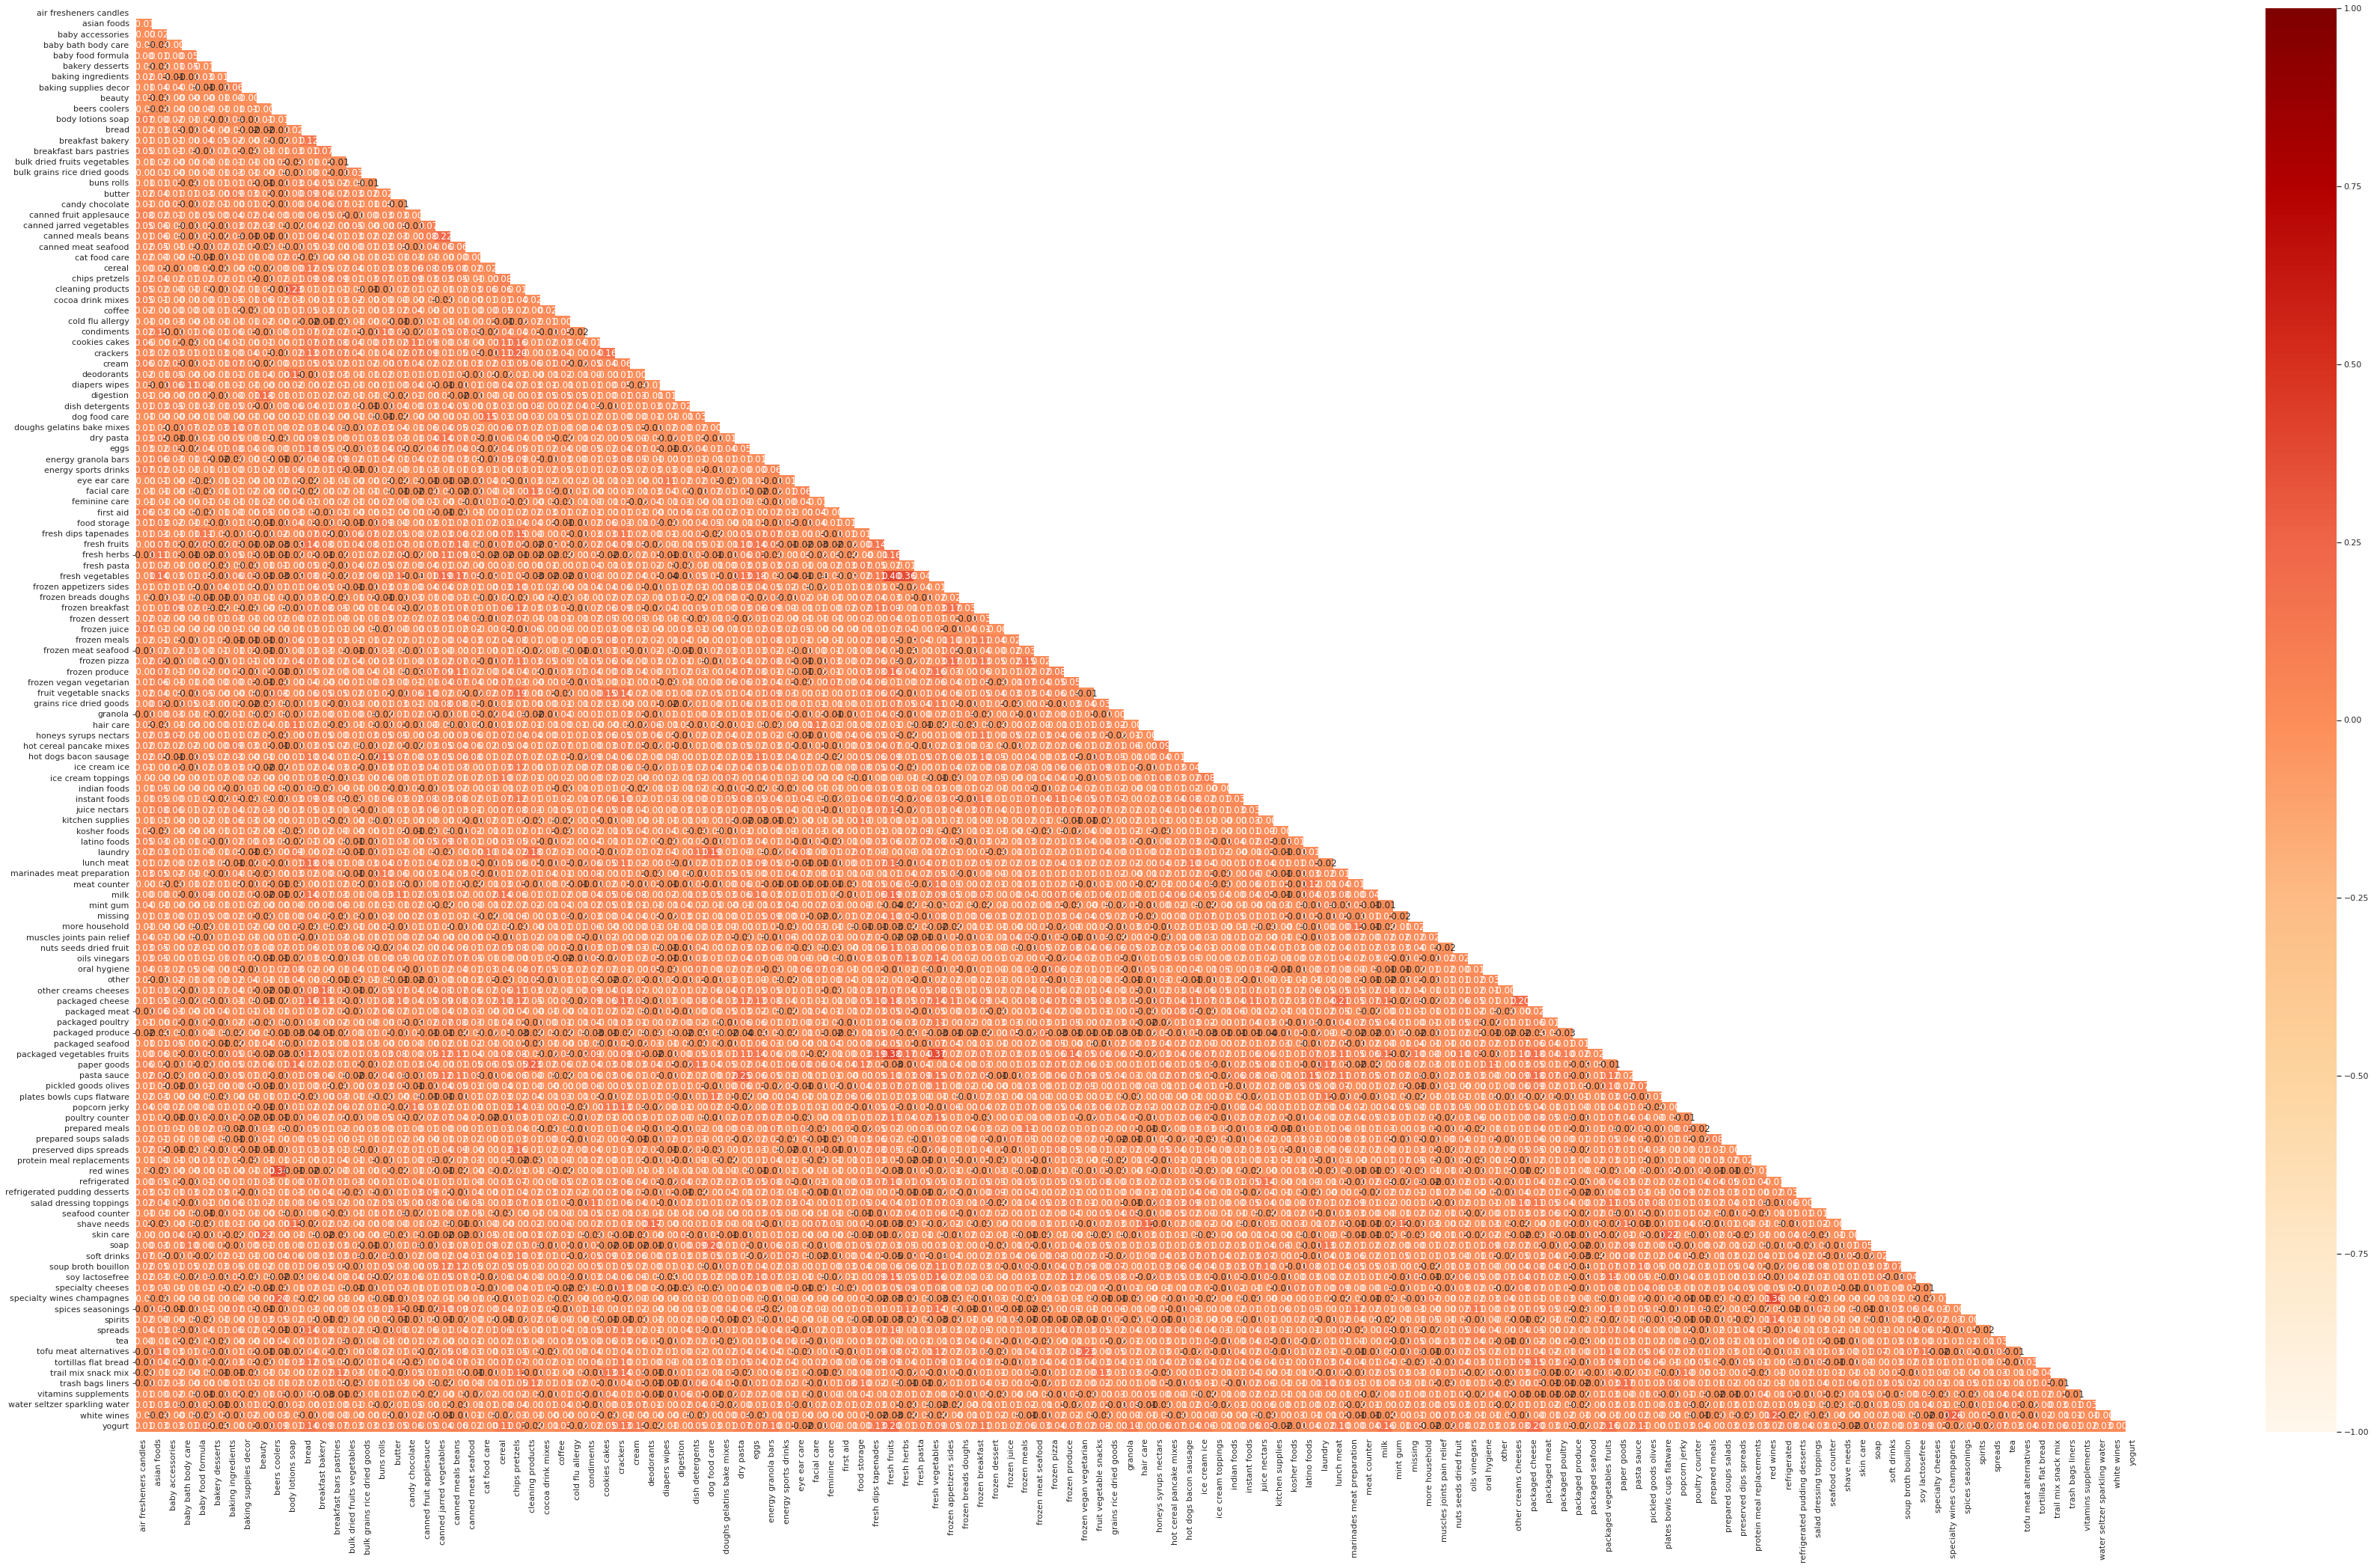

In [ ]:
import seaborn as sns

sns.set()
sns.set_style("whitegrid")
plt.figure(figsize=(60,35))

mask = np.triu(np.ones_like(order_products.corr(), dtype=np.bool))
sns.heatmap(order_products.corr(),
            mask=mask,
            annot=True,
            fmt='.2f',
            vmin=-1, 
            vmax=1, 
            cmap='OrRd')

plt.show()

In [ ]:
df_correl = order_products.corr().mul(mask)
prod_corr = df_correl.unstack().sort_values(ascending=False)
prod_corr = prod_corr[prod_corr > 0]

display(prod_corr[df_correl.shape[0]:df_correl.shape[0]+10])

fresh vegetables            fresh fruits                  0.395511
packaged vegetables fruits  fresh fruits                  0.378938
                            fresh vegetables              0.373461
fresh vegetables            fresh herbs                   0.362305
specialty wines champagnes  red wines                     0.358062
red wines                   beers coolers                 0.344706
white wines                 specialty wines champagnes    0.255946
pasta sauce                 dry pasta                     0.251168
paper goods                 cleaning products             0.232087
cleaning products           body lotions soap             0.231253
dtype: float64

###Sales

In [ ]:
# Total sales per customer (order_id)
sales_sum = np.dot(order_products, price)

# Join dataframe sales_sum with grocery_order
sales = pd.DataFrame(sales_sum, columns=['sales'])
grocery_order = grocery.iloc[:, :8].join(sales)
grocery_order.head(10)

,order_id,pay_method,order_hour_of_day,arrival_ timestamp,pickup_timestamp,start_service_time,finish_service_time,days_since_prior_order,sales
0,930878,2.0,0.0,0:00:22,0:07:10,0:07:10,0:09:43,17.0,38.78
1,1494544,2.0,0.0,0:02:45,0:07:41,0:07:41,0:10:25,11.0,16.92
2,3275833,1.0,0.0,0:03:17,0:23:22,0:23:22,0:26:11,3.0,198.23
3,57650,2.0,0.0,0:03:33,0:16:29,0:16:29,0:22:11,3.0,74.19
4,2002409,1.0,0.0,0:03:59,0:19:11,0:19:11,0:24:25,10.0,104.66
5,60770,2.0,0.0,0:04:29,0:10:13,0:10:13,0:16:38,30.0,46.87
6,464722,3.0,0.0,0:05:49,0:30:13,0:30:13,0:35:07,26.0,180.20
7,2852877,1.0,0.0,0:08:59,0:30:22,0:30:22,0:33:55,30.0,143.34
8,2256545,2.0,0.0,0:15:42,0:28:10,0:28:10,0:34:37,30.0,109.53
9,2201462,3.0,0.0,0:17:00,0:25:21,0:25:21,0:32:24,7.0,69.58


####Sales per Minutes

In [ ]:
# Prepare dataset for sales per minutes
#grocery_order.groupby(grocery_order.Grouper(freq='60Min', base=10, label='right')).sales.sum().reset_index()
df_time_sales = grocery_order.loc[:, ["arrival_ timestamp", "sales"]]
df_time_sales = df_time_sales.rename({'arrival_ timestamp': 'time_by_1'}, axis='columns')
df_time_sales['time_by_1'] = pd.to_datetime(df_time_sales['time_by_1'])
df_time_sales = df_time_sales.groupby(pd.Grouper(key="time_by_1", freq='1Min', label='right')).sales.sum().reset_index()
df_time_sales['time_by_1'] = pd.to_datetime(df_time_sales['time_by_1'], format= '%H:%M:%S').dt.time

display(df_time_sales.head())
display(df_time_sales.shape)

,time_by_1,sales
0,00:01:00,38.78
1,00:02:00,0.00
2,00:03:00,16.92
3,00:04:00,377.08
4,00:05:00,46.87


(1440, 2)

In [ ]:
# Plot 1Min sales
plot_data = [
    go.Scatter(
        x=df_time_sales['time_by_1'],
        y=df_time_sales['sales'],
    )
]
plot_layout = go.Layout(
        title='Sales per Minutes of Arrival Time'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

####Sales per 5 Minutes

In [ ]:
# Prepare dataset for sales per 5 minutes
#grocery_order.groupby(grocery_order.Grouper(freq='60Min', base=10, label='right')).sales.sum().reset_index()
df_time_sales = grocery_order.loc[:, ["arrival_ timestamp", "sales"]]
df_time_sales = df_time_sales.rename({'arrival_ timestamp': 'time_by_5'}, axis='columns')
df_time_sales['time_by_5'] = pd.to_datetime(df_time_sales['time_by_5'])
df_time_sales = df_time_sales.groupby(pd.Grouper(key="time_by_5", freq='5Min', label='right')).sales.sum().reset_index()
df_time_sales['time_by_5'] = pd.to_datetime(df_time_sales['time_by_5'], format= '%H:%M:%S').dt.time

display(df_time_sales.head())
display(df_time_sales.shape)

,time_by_5,sales
0,00:05:00,479.65
1,00:10:00,323.54
2,00:15:00,0.00
3,00:20:00,269.41
4,00:25:00,473.10


(288, 2)

In [ ]:
# Plot 5Min sales
plot_data = [
    go.Scatter(
        x=df_time_sales['time_by_5'],
        y=df_time_sales['sales'],
    )
]
plot_layout = go.Layout(
        title='Sales per 5 Minutes of Arrival Time'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

####Sales per 30 Minutes

In [ ]:
# Prepare dataset for sales per 30 minutes
df_time_sales = grocery_order.loc[:, ["arrival_ timestamp", "sales"]]
df_time_sales = df_time_sales.rename({'arrival_ timestamp': 'time_by_30'}, axis='columns')
df_time_sales['time_by_30'] = pd.to_datetime(df_time_sales['time_by_30'])
df_time_sales = df_time_sales.groupby(pd.Grouper(key="time_by_30", freq='30Min', label='right')).sales.sum().reset_index()
df_time_sales['time_by_30'] = pd.to_datetime(df_time_sales['time_by_30'], format= '%H:%M:%S').dt.time

display(df_time_sales.head())
display(df_time_sales.shape)

,time_by_30,sales
0,00:30:00,1576.12
1,01:00:00,986.90
2,01:30:00,1230.88
3,02:00:00,781.25
4,02:30:00,517.90


(48, 2)

In [ ]:
# Plot 30Min sales
plot_data = [
    go.Scatter(
        x=df_time_sales['time_by_30'],
        y=df_time_sales['sales'],
    )
]
plot_layout = go.Layout(
        title='Sales per 30 Minutes of Arrival Time'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

####Sales per Hours

In [ ]:
# Prepare dataset for sales per hours 
df_order_sales = grocery_order.loc[:, ["order_hour_of_day", "sales"]]
df_order_sales = df_order_sales.groupby('order_hour_of_day').sales.sum().reset_index()
df_order_sales.order_hour_of_day = df_order_sales.order_hour_of_day.astype(int).astype(str)

display(df_order_sales.head())
display(df_order_sales.shape)

,order_hour_of_day,sales
0,0,2563.02
1,1,2012.13
2,2,792.14
3,3,223.94
4,4,874.65


(24, 2)

In [ ]:
# Plot Hourly sales
plot_data = [
    go.Scatter(
        x=df_order_sales['order_hour_of_day'],
        y=df_order_sales['sales'],
    )
]
plot_layout = go.Layout(
        title='Hourly Sales'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

##Data Modeling

###MODEL 1: Sales Prediction

Dataset have limitation because avaliable for one day only. For this purpose, we will try to predict sales per minutes.

In [ ]:
# Import libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error

# Test GPU
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
# Prepare dataset for sales per minutes
df_time_sales = grocery_order.loc[:, ["arrival_ timestamp", "sales"]]
df_time_sales = df_time_sales.rename({'arrival_ timestamp': 'time_by_1'}, axis='columns')
df_time_sales['time_by_1'] = pd.to_datetime(df_time_sales['time_by_1'])
df_time_sales = df_time_sales.groupby(pd.Grouper(key="time_by_1", freq='1Min', label='right')).sales.sum().reset_index()
df_time_sales['time_by_1'] = pd.to_datetime(df_time_sales['time_by_1'], format= '%H:%M:%S').dt.time
df_time_sales = df_time_sales.set_index('time_by_1')

display(df_time_sales.head())
display(df_time_sales.shape)

,sales
time_by_1,
00:01:00,38.78
00:02:00,0.00
00:03:00,16.92
00:04:00,377.08
00:05:00,46.87


(1440, 1)

In [ ]:
# Display 15 min rolling mean
df_time_sales.rolling(15).mean().head(20)

,sales
time_by_1,
00:01:00,NaN
00:02:00,NaN
00:03:00,NaN
00:04:00,NaN
00:05:00,NaN
00:06:00,NaN
00:07:00,NaN
00:08:00,NaN
00:09:00,NaN


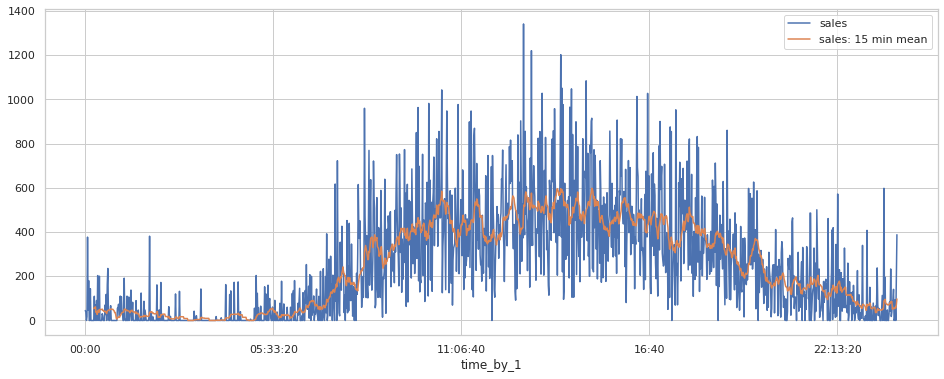

In [ ]:
df_time_sales['sales: 15 min mean'] = df_time_sales.rolling(15).mean()
df_time_sales[['sales','sales: 15 min mean']].plot(figsize=(16,6))

In [ ]:
df_time_sales.head(20)

,sales,sales: 15 min mean
time_by_1,,
00:01:00,38.78,NaN
00:02:00,0.00,NaN
00:03:00,16.92,NaN
00:04:00,377.08,NaN
00:05:00,46.87,NaN
00:06:00,180.20,NaN
00:07:00,0.00,NaN
00:08:00,0.00,NaN
00:09:00,143.34,NaN


In [ ]:
# Split the data into training and testing dataset
df_sales = df_time_sales['sales']
df_sales = pd.DataFrame(df_sales).sort_index()
split = int(df_sales.shape[0]*0.8)

time_train = df_sales.iloc[:split]
print('Training Dataset')
display(time_train.head())
display(time_train.shape)

time_test = df_sales.iloc[split:]
print('\nTesting Dataset')
display(time_test.head())
display(time_test.shape)

Training Dataset


,sales
time_by_1,
00:00:00,44.94
00:01:00,38.78
00:02:00,0.00
00:03:00,16.92
00:04:00,377.08


(1152, 1)


Testing Dataset


,sales
time_by_1,
19:12:00,486.96
19:13:00,165.82
19:14:00,435.28
19:15:00,58.39
19:16:00,95.83


(288, 1)

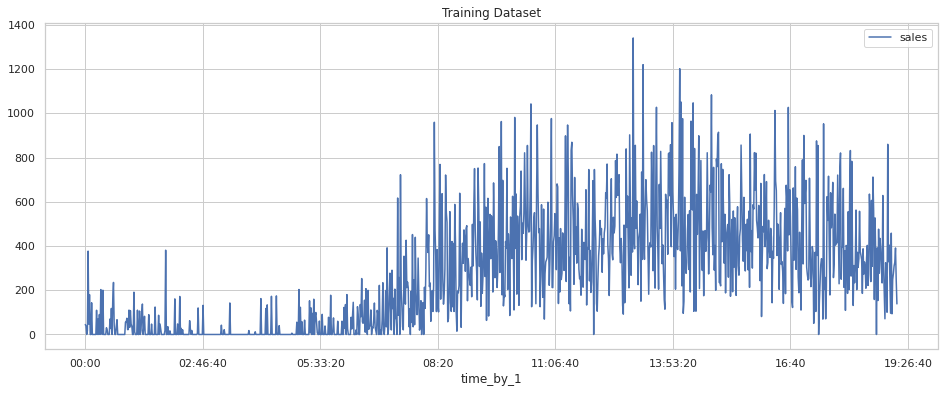

In [ ]:
# Plot Training Dataset
time_train.plot(figsize=(16,6), title="Training Dataset")

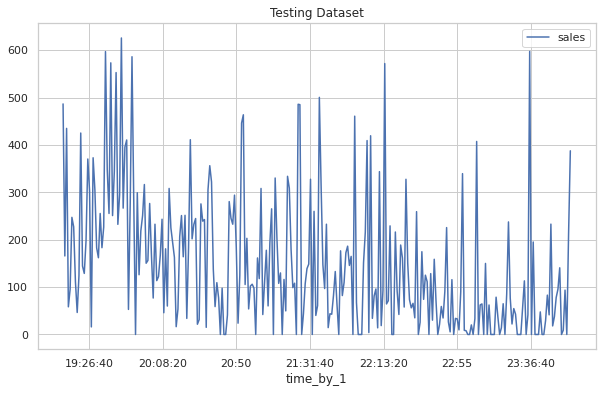

In [ ]:
# Plot Testing Dataset
time_test.plot(figsize=(10,6), title="Testing Dataset")

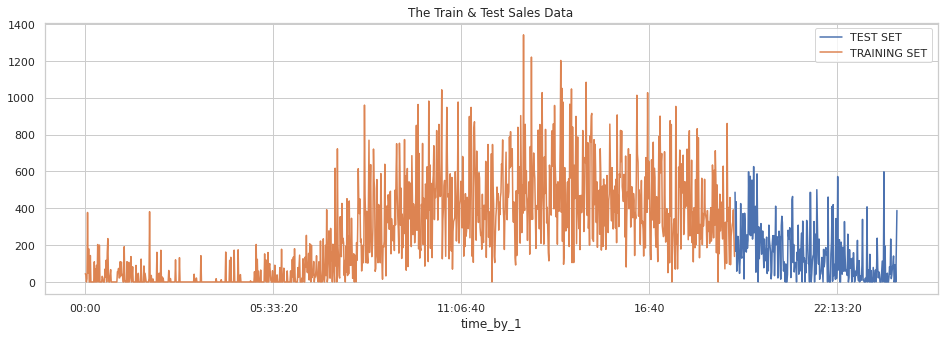

In [ ]:
# Train and test data visualization
time_test.rename(columns={'sales': 'TEST SET'})\
        .join(time_train.rename(columns={'sales': 'TRAINING SET'}),how='outer')\
        .plot(figsize=(16,5), title="The Train & Test Sales Data", style='-')
plt.show()

In [ ]:
# Feature Scaling
sc = MinMaxScaler()

training_set_scaled = sc.fit_transform(time_train)
testing_set_scaled = sc.transform(time_test)

print(training_set_scaled.shape, testing_set_scaled.shape)

(1152, 1) (288, 1)


In [ ]:
# Creating a train data structure with 15 timesteps and 1 output
X_train = []
y_train = []
for i in range(15, training_set_scaled.shape[0]):
    X_train.append(training_set_scaled[i-15:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

print(X_train.shape, y_train.shape)

(1137, 15, 1) (1137,)


In [ ]:
# Creating a test data structure with 15 timesteps and 1 output
X_test = []
y_test = []
for i in range(15, testing_set_scaled.shape[0]):
    X_test.append(testing_set_scaled[i-15:i, 0])
    y_test.append(testing_set_scaled[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

# Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(X_test.shape, y_test.shape)

(273, 15, 1) (273,)


In [ ]:
# Initialising the RNN
model = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(150, 
               return_sequences=True, 
               input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.3))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(150, return_sequences=True))
model.add(Dropout(0.3))

# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(150))
model.add(Dropout(0.3))

# Adding dense as output layer
model.add(Dense(1, activation = "linear"))

In [ ]:
# Compiling the RNN
model.compile(loss='mse', optimizer='adam')
print('model compiled')
print(model.summary())

model compiled
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 15, 150)           91200     
                                                                 
 dropout_2 (Dropout)         (None, 15, 150)           0         
                                                                 
 lstm_3 (LSTM)               (None, 15, 150)           180600    
                                                                 
 dropout_3 (Dropout)         (None, 15, 150)           0         
                                                                 
 lstm_4 (LSTM)               (None, 150)               180600    
                                                                 
 dropout_4 (Dropout)         (None, 150)               0         
                                                                 
 dense_1 (Dense)             (None, 1) 

In [ ]:
# Set up parameters
epoch = 100 
batch_size = 32

# Callbacks
Early_Stopper = EarlyStopping(monitor='val_loss',
                         patience=15,
                         min_delta=0.0001,
                         restore_best_weights=True)

# Fit Model
model.fit(X_train, y_train, 
          epochs=epoch,
          batch_size=batch_size,
          validation_data=(X_test, y_test),
          callbacks=[Early_Stopper],
          verbose=2,
          shuffle=False)

Epoch 1/100
36/36 - 10s - loss: 0.0225 - val_loss: 0.0163 - 10s/epoch - 287ms/step
Epoch 2/100
36/36 - 0s - loss: 0.0325 - val_loss: 0.0235 - 308ms/epoch - 9ms/step
Epoch 3/100
36/36 - 0s - loss: 0.0340 - val_loss: 0.0177 - 313ms/epoch - 9ms/step
Epoch 4/100
36/36 - 0s - loss: 0.0307 - val_loss: 0.0155 - 332ms/epoch - 9ms/step
Epoch 5/100
36/36 - 0s - loss: 0.0282 - val_loss: 0.0127 - 317ms/epoch - 9ms/step
Epoch 6/100
36/36 - 0s - loss: 0.0239 - val_loss: 0.0114 - 317ms/epoch - 9ms/step
Epoch 7/100
36/36 - 0s - loss: 0.0240 - val_loss: 0.0160 - 318ms/epoch - 9ms/step
Epoch 8/100
36/36 - 0s - loss: 0.0244 - val_loss: 0.0218 - 311ms/epoch - 9ms/step
Epoch 9/100
36/36 - 0s - loss: 0.0228 - val_loss: 0.0175 - 309ms/epoch - 9ms/step
Epoch 10/100
36/36 - 0s - loss: 0.0285 - val_loss: 0.0199 - 326ms/epoch - 9ms/step
Epoch 11/100
36/36 - 0s - loss: 0.0226 - val_loss: 0.0177 - 318ms/epoch - 9ms/step
Epoch 12/100
36/36 - 0s - loss: 0.0197 - val_loss: 0.0228 - 314ms/epoch - 9ms/step
Epoch 13/100

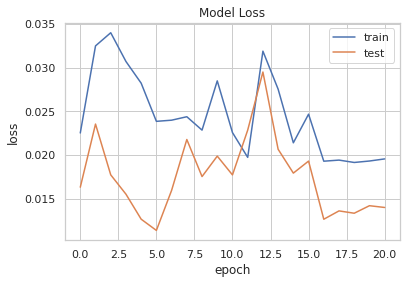

In [ ]:
# Plot loss history
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [ ]:
# Create prediction
predicted_sales = model.predict(X_test)

# Inverse scaling for prediction result
predicted_sales = sc.inverse_transform(predicted_sales)
predicted_sales = pd.DataFrame(predicted_sales)
predicted_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       273 non-null    float32
dtypes: float32(1)
memory usage: 1.2 KB


In [ ]:
# Join dataframe real sales with predicted sales
df_predict = time_test[15:].reset_index()
df_predict = df_predict.join(predicted_sales)
df_predict = df_predict.rename(columns={0: 'predicted_sales'}).set_index('time_by_1')

display(df_predict.head())
display(df_predict.info())

,sales,predicted_sales
time_by_1,,
19:27:00,302.49,254.926987
19:28:00,15.97,248.464355
19:29:00,373.24,251.022369
19:30:00,305.88,245.745636
19:31:00,183.10,254.904999


<class 'pandas.core.frame.DataFrame'>
Index: 273 entries, 19:27:00 to 23:59:00
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sales            273 non-null    float64
 1   predicted_sales  273 non-null    float32
dtypes: float32(1), float64(1)
memory usage: 5.3+ KB


None

Root Mean Squared Error (RMSE) of Testing Data: 143.103


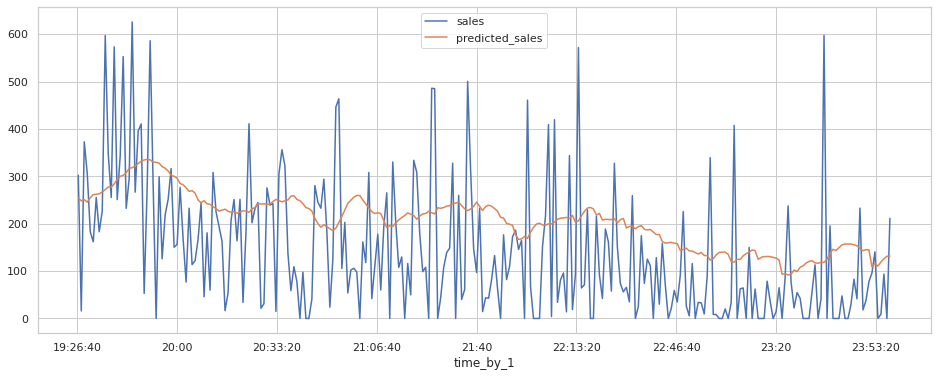

In [ ]:
# Visualising the results
df_predict[['sales','predicted_sales']][:-1].plot(figsize=(16,6))

# Calculate RMSE
metrics = np.sqrt(mean_squared_error(df_predict.sales, df_predict.predicted_sales))
print('Root Mean Squared Error (RMSE) of Testing Data: %.3f' % metrics)

,sales,predicted_sales
time_by_1,,
00:15:00,0.00,135.763031
00:16:00,109.53,129.790634
00:17:00,0.00,125.261063
00:18:00,69.58,123.103104
00:19:00,0.00,120.483383


<class 'pandas.core.frame.DataFrame'>
Index: 1425 entries, 00:15:00 to 23:59:00
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sales            1425 non-null   float64
 1   predicted_sales  1425 non-null   float32
dtypes: float32(1), float64(1)
memory usage: 27.8+ KB


None

Root Mean Squared Error (RMSE) of Testing Data: 183.749


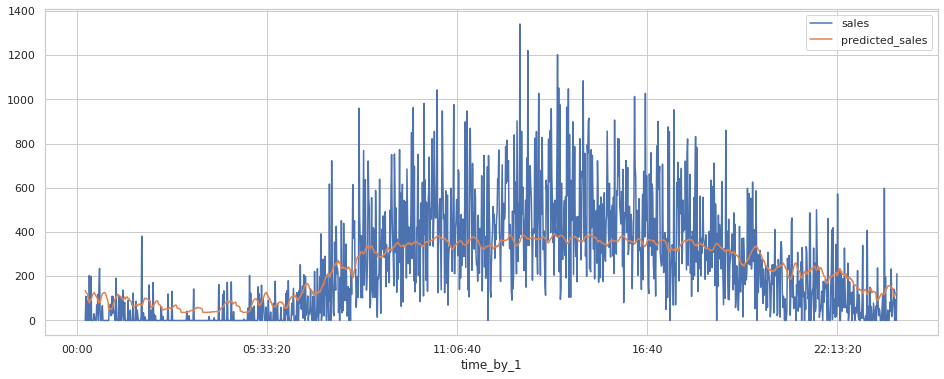

In [ ]:
# Predict all data
# Scale full dataset from df_sales
all_set_scaled = sc.transform(df_sales)

# Creating a train data structure with 15 timesteps and 1 output
X_all = []
y_all = []
for i in range(15, all_set_scaled.shape[0]):
    X_all.append(all_set_scaled[i-15:i, 0])
    y_all.append(all_set_scaled[i, 0])
X_all, y_all = np.array(X_all), np.array(y_all)

# Reshaping
X_all = np.reshape(X_all, (X_all.shape[0], X_all.shape[1], 1))

# Create prediction
predicted_all = model.predict(X_all)

# Inverse scaling for prediction result
predicted_all = sc.inverse_transform(predicted_all)
predicted_all = pd.DataFrame(predicted_all)

# Join dataframe real sales with predicted sales
df_predict_all = df_sales[15:].reset_index()
df_predict_all = df_predict_all.join(predicted_all)
df_predict_all = df_predict_all.rename(columns={0: 'predicted_sales'}).set_index('time_by_1')

display(df_predict_all.head())
display(df_predict_all.info())

# Visualising the results
df_predict_all[['sales','predicted_sales']][:-1].plot(figsize=(16,6))

# Calculate RMSE
metrics = np.sqrt(mean_squared_error(df_predict_all.sales, 
                                     df_predict_all.predicted_sales))
print('Root Mean Squared Error (RMSE) of Testing Data: %.3f' % metrics)

###MODEL 2: Recommendation System
Simple Item Based Recommendation using Pairwise Correlation

In [ ]:
# Prepare dataset
df_products = order_products.copy()
display(df_products.head())
display(df_products.shape)

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
order_id,,,,,,,,,,,,,,,,,,,,,
930878,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1494544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3275833,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
57650,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2002409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


(5000, 134)

In [ ]:
# Prepare Dataset
df_costs = product_prices.copy().set_index('product')
display(df_costs.head())
display(df_costs.shape)

,price
product,
air fresheners candles,12.25
asian foods,22.95
baby accessories,28.92
baby bath body care,24.99
baby food formula,19.98


(134, 1)

In [ ]:
# Fungsi 1
def product_list(df_products, df_costs):
  '''
  Function to list product names based on customer input.
  '''
  print('Welcome to Our Shop!','\nWhat do you need?')
  # Input the product name and display its availability
  prod_demand = input()
  prod_list = [colname for colname in \
               df_products.columns[df_products.columns.str.contains(prod_demand)]]
  prod_list = pd.DataFrame(prod_list, columns=["Products"])
  prod_list = prod_list.join(df_costs, on="Products")
  print('Choose the available products below: ')
  
  if prod_list.empty:
    print('Product is not available, please repeat your request!')
  else:
    display(prod_list)
    return prod_list

In [ ]:
# Fungsi 2
def product_recommender(df_products, df_costs):
  '''
  Function to recommend some product based on Pairwise Correlation.
  '''
  # Input from available product list
  wanted_product = product_list(df_products, df_costs)
  while wanted_product is None:
    print("Continue (Y/N)?")
    cust_answer = input()
    if cust_answer.upper() == "Y":
      wanted_product = product_list(df_products, df_costs)
    else:
      return print("Thanks for your visit!")

  print("Enter the product number:")
  prod_index = int(input())
  prod_to_basket = wanted_product.iloc[prod_index, 0]
  print("You choose", prod_to_basket)

  # Simple Item Based Recommendation using Pairwise Correlation
  prod_to_recom = df_products[prod_to_basket]
  recommended_prod = df_products.corrwith(prod_to_recom)
  recommended_prod = recommended_prod.sort_values(ascending=False)

  # Correlation coefficient is shown for learning purposes
  recommended_prod = pd.DataFrame(recommended_prod, 
                                  columns=["Correlation Coefficient"])
  recommended_prod = recommended_prod.join(df_costs).reset_index().loc[1:6]
  recommended_prod = recommended_prod.rename(columns={"index": "Products"})

  print("Recommended products for you ")
  display(recommended_prod)

  return print("Thanks for your visit!", "Please explore our other products")

In [ ]:
# Check the result of The Product Recommendation System
product_recommender(df_products, df_costs)

Welcome to Our Shop! 
What do you need?
coffee
Choose the available products below: 


,Products,price
0,coffee,7.94


Enter the product number:
0
You choose coffee
Recommended products for you 


,Products,Correlation Coefficient,price
1,cream,0.086993,8.12
2,hot cereal pancake mixes,0.066381,4.99
3,shave needs,0.064151,7.89
4,paper goods,0.059587,5.50
5,digestion,0.054051,6.74
6,dog food care,0.053347,9.41


Thanks for your visit! Please explore our other products


###MODEL 3: Association Rules
Our group interest parameters on these Association Rules:
1. Support: the popularity of an itemset, as measured by the proportion of transactions in which an itemset appears.
2. Confidence: The likelihood of item Y is purchased when item X is purchased.
3. Lift: The likelihood of item Y is purchased when item X is purchased, while controlling for how popular item Y is.
4. Antecedents & Consequents: The IF & THEN component of an association rule and have no same items in it.

In [ ]:
# Import library
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
# Prepare dataset used for Association Rule
assoc_df = order_products.copy()
display(assoc_df.head())
display(assoc_df.info())

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
order_id,,,,,,,,,,,,,,,,,,,,,
930878,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1494544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3275833,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
57650,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2002409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 930878 to 3193956
Columns: 134 entries, air fresheners candles to yogurt
dtypes: float64(134)
memory usage: 5.1 MB


None

In [ ]:
# Data preprocessing
# Cast data type to int
assoc_df = assoc_df.astype('int')
  
# Replace non-zero values to 1
for i in range(1, assoc_df.values.max()+1):
  assoc_df.replace(i, 1, inplace=True)

display(assoc_df.head(10))
display(assoc_df.info())

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
order_id,,,,,,,,,,,,,,,,,,,,,
930878,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1494544,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3275833,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
57650,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2002409,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
60770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
464722,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2852877,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2256545,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 930878 to 3193956
Columns: 134 entries, air fresheners candles to yogurt
dtypes: int64(134)
memory usage: 5.1 MB


None

In [ ]:
# Extract the most frequest products
# The length column has been added to increase ease of filtering.

frequent_prod = apriori(assoc_df,
                        min_support=0.01,
                        use_colnames=True)
frequent_prod['prod_amount'] = frequent_prod['itemsets'].apply(lambda x: len(x))
frequent_prod

,support,itemsets,prod_amount
0,0.0418,(asian foods),1
1,0.0372,(baby food formula),1
2,0.0102,(bakery desserts),1
3,0.0796,(baking ingredients),1
4,0.0182,(body lotions soap),1
...,...,...,...
3786,0.0110,"(packaged vegetables fruits, fresh fruits, pac...",6
3787,0.0102,"(packaged vegetables fruits, fresh fruits, pac...",6
3788,0.0178,"(packaged vegetables fruits, fresh fruits, pac...",6
3789,0.0124,"(packaged vegetables fruits, fresh fruits, pac...",6


In [ ]:
# Create Rules
# Set "Lift" as metric with treshold of "2"
assoc_rules = association_rules(frequent_prod, metric="lift", min_threshold=2)
assoc_rules["antecedents_len"] = assoc_rules["antecedents"].apply(lambda x: len(x))
assoc_rules["consequents_len"] = assoc_rules["consequents"].apply(lambda x: len(x))
assoc_rules.sort_values("lift", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_len,consequents_len
8327,"(fresh fruits, pasta sauce)","(packaged vegetables fruits, dry pasta, fresh ...",0.0478,0.0328,0.0102,0.213389,6.505766,0.008632,1.229579,2,3
8318,"(packaged vegetables fruits, dry pasta, fresh ...","(fresh fruits, pasta sauce)",0.0328,0.0478,0.0102,0.310976,6.505766,0.008632,1.381954,3,2
8314,"(packaged vegetables fruits, dry pasta, fresh ...","(pasta sauce, fresh vegetables)",0.0340,0.0466,0.0102,0.300000,6.437768,0.008616,1.362000,3,2
8331,"(pasta sauce, fresh vegetables)","(packaged vegetables fruits, dry pasta, fresh ...",0.0466,0.0340,0.0102,0.218884,6.437768,0.008616,1.236692,2,3
8325,"(packaged vegetables fruits, dry pasta)","(fresh fruits, pasta sauce, fresh vegetables)",0.0428,0.0372,0.0102,0.238318,6.406391,0.008608,1.264044,2,3
...,...,...,...,...,...,...,...,...,...,...,...
3404,"(chips pretzels, fresh dips tapenades, yogurt)",(packaged vegetables fruits),0.0130,0.3846,0.0100,0.769231,2.000080,0.005000,2.666733,3,1
6117,(packaged vegetables fruits),"(oils vinegars, fresh vegetables, yogurt)",0.3846,0.0156,0.0120,0.031201,2.000080,0.006000,1.016104,1,3
6092,"(fresh vegetables, nuts seeds dried fruit, soy...",(packaged vegetables fruits),0.0156,0.3846,0.0120,0.769231,2.000080,0.006000,2.666733,3,1
10250,"(packaged cheese, soup broth bouillon, fresh v...","(packaged vegetables fruits, fresh fruits)",0.0218,0.2844,0.0124,0.568807,2.000026,0.006200,1.659583,3,2


In [ ]:
# Display summary about the dataframe created from association rules
assoc_rules.describe(include='all')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_len,consequents_len
count,11700,11700,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000
unique,1210,1210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,(packaged cheese),(packaged cheese),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,278,278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.097299,0.097299,0.013628,0.231146,2.443966,0.007871,1.265478,2.181368,2.181368
std,NaN,NaN,0.077078,0.077078,0.004749,0.169687,0.422034,0.002606,0.754824,0.773146,0.773146
min,NaN,NaN,0.010600,0.010600,0.010000,0.021815,2.000026,0.005000,1.011465,1.000000,1.000000
25%,NaN,NaN,0.042800,0.042800,0.010600,0.105348,2.143653,0.006276,1.068785,2.000000,2.000000
50%,NaN,NaN,0.073000,0.073000,0.012200,0.184066,2.335487,0.007134,1.133238,2.000000,2.000000
75%,NaN,NaN,0.122400,0.122400,0.014800,0.306319,2.628658,0.008636,1.259716,3.000000,3.000000


Based on information above, we can see the range of our focused metrics as follows:
1. Support: 0.010000 - 0.086800
2. Confidence: 0.021815 - 0.984848
3. Lift: 2.000026 - 6.505766
4. Antecedent & Consequents Length : 1 - 5

We can analyze further with filtering the DataFrame. For example, we have the following criteria:
1. Support > 0.05
2. Confidence > 0.5
3. Lift >= 2

In [ ]:
assoc_rules[(assoc_rules['support'] >= 0.05) &
            (assoc_rules['confidence'] > 0.5) &
            (assoc_rules['lift'] >= 2)
            ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_len,consequents_len
1165,(fresh herbs),"(fresh fruits, fresh vegetables)",0.1004,0.3282,0.0666,0.663347,2.021166,0.033649,1.995524,1,2
1247,(fresh herbs),"(packaged vegetables fruits, fresh vegetables)",0.1004,0.2530,0.0550,0.547809,2.165252,0.029599,1.651956,1,2
5193,"(fresh vegetables, yogurt)","(fresh fruits, packaged vegetables fruits)",0.1484,0.2844,0.0868,0.584906,2.056630,0.044595,1.723945,2,2


We also can filter based on itemset, for example we want to check top 5 results for some antecedents below:
1. Coffee
2. Coffee & Milk
3. Milk & Bread

In [ ]:
# Itemset: Coffee
assoc_rules[assoc_rules['antecedents'] == {'coffee'}].head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_len,consequents_len
61,(coffee),(cream),0.058,0.0874,0.0106,0.182759,2.09106,0.005531,1.116684,1,1


In [ ]:
# Itemset: Coffee & Milk
assoc_rules[assoc_rules['antecedents'] == {'coffee', 'milk'}].head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_len,consequents_len


In [ ]:
# Itemset: Milk & Bread
assoc_rules[assoc_rules['antecedents'] == {'milk', 'bread'}].head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_len,consequents_len
168,"(bread, milk)",(cereal),0.0594,0.1004,0.0150,0.252525,2.515192,0.009036,1.203519,2,1
233,"(bread, milk)",(crackers),0.0594,0.1158,0.0146,0.245791,2.122550,0.007721,1.172354,2,1
274,"(bread, milk)",(eggs),0.0594,0.1402,0.0170,0.286195,2.041336,0.008672,1.204531,2,1
383,"(bread, milk)",(lunch meat),0.0594,0.1088,0.0144,0.242424,2.228164,0.007937,1.176384,2,1
408,"(bread, milk)",(spreads),0.0594,0.0804,0.0104,0.175084,2.177664,0.005624,1.114780,2,1
